In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from xgboost import XGBRegressor


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/shai-ml/sample_submission.csv
/kaggle/input/shai-ml/train.csv
/kaggle/input/shai-ml/test.csv


In [2]:


train=pd.read_csv("../input/shai-ml/train.csv")
#train=train.iloc[:,1:]
sample=pd.read_csv("../input/shai-ml/sample_submission.csv")
y_train=train["price"]
x_train=train.drop(["price","Unnamed: 0"], axis=1, inplace=False)


sample=pd.DataFrame(sample)








In [9]:
train.shape

(43040, 11)

In [15]:
train.price.std()

4023.534555543323

In [5]:
train.info 

<bound method DataFrame.info of        Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0               2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
1               4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
2               5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
3               6   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94   
4               7   0.24  Very Good     I    VVS1   62.3   57.0    336  3.95   
...           ...    ...        ...   ...     ...    ...    ...    ...   ...   
43035       53935   0.72    Premium     D     SI1   62.7   59.0   2757  5.69   
43036       53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75   
43037       53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69   
43038       53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
43039       53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83   

       

In [170]:
train.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [171]:
train.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [16]:
train.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
2,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
3,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
4,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47


In [31]:
train.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000
mean,26758.804554,0.796964,61.746080,57.439542,3942.706343,5.724376,5.728122,3.534367
std,15484.904515,0.481455,1.435246,2.240196,4023.534556,1.132496,1.159641,0.714543
min,2.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13326.750000,0.380000,61.000000,56.000000,940.000000,4.660000,4.670000,2.870000
50%,26824.500000,0.710000,61.800000,57.000000,2388.000000,5.710000,5.720000,3.530000
75%,40290.250000,1.030000,62.500000,59.000000,5309.250000,6.500000,6.500000,4.020000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [36]:
s=x_train.groupby("cut")
print(s.mean())
print(s.std())
print(s.max())
print(s.min())

              carat      depth      table         x         y         z
cut                                                                    
Fair       1.071293  64.011909  59.090300  6.292066  6.228084  4.010584
Good       0.858941  62.387494  58.634194  5.856414  5.868240  3.650703
Ideal      0.694497  61.700011  55.946074  5.483413  5.496709  3.386297
Premium    0.892440  61.261590  58.752062  5.966776  5.938785  3.642259
Very Good  0.812058  61.827522  57.947624  5.755048  5.784094  3.569565
              carat     depth     table         x         y         z
cut                                                                  
Fair       0.532384  3.753488  3.975478  0.987955  0.979150  0.668299
Good       0.463960  2.154295  2.867146  1.075709  1.069183  0.663547
Ideal      0.433961  0.722492  1.254301  1.065310  1.079166  0.658053
Premium    0.527084  1.157876  1.482166  1.209372  1.299247  0.743844
Very Good  0.465053  1.382428  2.134626  1.100360  1.102756  0.741904
      

In [58]:
s=x_train.groupby("clarity")
print(s.mean())
print(s.std())
print(s.max())
print(s.min())

            carat      depth      table         x         y         z
clarity                                                              
I1       1.343250  62.699461  58.369479  6.859408  6.809982  4.263142
IF       0.495577  61.523668  56.524208  4.938200  4.959494  3.043931
SI1      0.850113  61.841426  57.652938  5.881830  5.881510  3.634662
SI2      1.091344  61.772276  57.928049  6.423316  6.420806  3.961859
VS1      0.723275  61.665921  57.304353  5.560863  5.571233  3.434670
VS2      0.750745  61.722342  57.403026  5.621608  5.623091  3.469430
VVS1     0.499531  61.639359  56.805426  4.951047  4.965930  3.056589
VVS2     0.595448  61.664385  56.950240  5.225178  5.239015  3.225491
            carat     depth     table         x         y         z
clarity                                                            
I1       0.669201  2.837439  2.568305  1.046288  1.044760  0.751245
IF       0.308230  1.048821  1.996830  0.852040  0.853166  0.524319
SI1      0.457845  1.485206 

In [59]:
s=x_train.groupby("color")
print(s.mean())
print(s.std())
print(s.max())
print(s.min())

          carat      depth      table         x         y         z
color                                                              
D      0.652468  61.695230  57.362880  5.405766  5.409629  3.335489
E      0.662666  61.659925  57.438211  5.427335  5.435533  3.351196
F      0.739035  61.692945  57.418493  5.620012  5.624948  3.467161
G      0.761228  61.759438  57.283161  5.648913  5.651616  3.487866
H      0.909367  61.836928  57.518042  5.965473  5.968807  3.684608
I      1.033551  61.826809  57.577845  6.222341  6.221589  3.843100
J      1.174500  61.870694  57.844860  6.533237  6.531371  4.040803
          carat     depth     table         x         y         z
color                                                            
D      0.355703  1.391059  2.192117  0.930133  0.926789  0.571804
E      0.369069  1.464797  2.233541  0.956516  0.998297  0.673826
F      0.399582  1.424537  2.286366  1.013665  1.004178  0.628066
G      0.443049  1.376829  2.147528  1.088792  1.080572  0

In [8]:
train.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

Unnamed: 0   -0.301711
carat         0.923801
depth        -0.014393
table         0.136975
price         1.000000
x             0.887483
y             0.863748
z             0.860625
Name: price, dtype: float64


<AxesSubplot:>

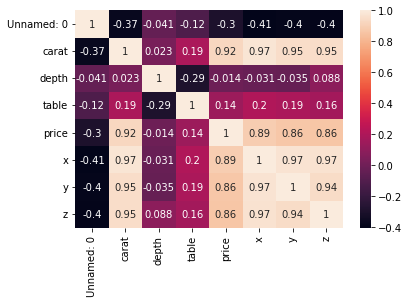

In [4]:
corr=train.corr()
print(corr.price)
sns.heatmap(train.corr(),annot=True)

array([[<AxesSubplot:xlabel='carat', ylabel='carat'>,
        <AxesSubplot:xlabel='depth', ylabel='carat'>,
        <AxesSubplot:xlabel='table', ylabel='carat'>,
        <AxesSubplot:xlabel='price', ylabel='carat'>,
        <AxesSubplot:xlabel='x', ylabel='carat'>,
        <AxesSubplot:xlabel='y', ylabel='carat'>,
        <AxesSubplot:xlabel='z', ylabel='carat'>],
       [<AxesSubplot:xlabel='carat', ylabel='depth'>,
        <AxesSubplot:xlabel='depth', ylabel='depth'>,
        <AxesSubplot:xlabel='table', ylabel='depth'>,
        <AxesSubplot:xlabel='price', ylabel='depth'>,
        <AxesSubplot:xlabel='x', ylabel='depth'>,
        <AxesSubplot:xlabel='y', ylabel='depth'>,
        <AxesSubplot:xlabel='z', ylabel='depth'>],
       [<AxesSubplot:xlabel='carat', ylabel='table'>,
        <AxesSubplot:xlabel='depth', ylabel='table'>,
        <AxesSubplot:xlabel='table', ylabel='table'>,
        <AxesSubplot:xlabel='price', ylabel='table'>,
        <AxesSubplot:xlabel='x', ylabel='table'>,


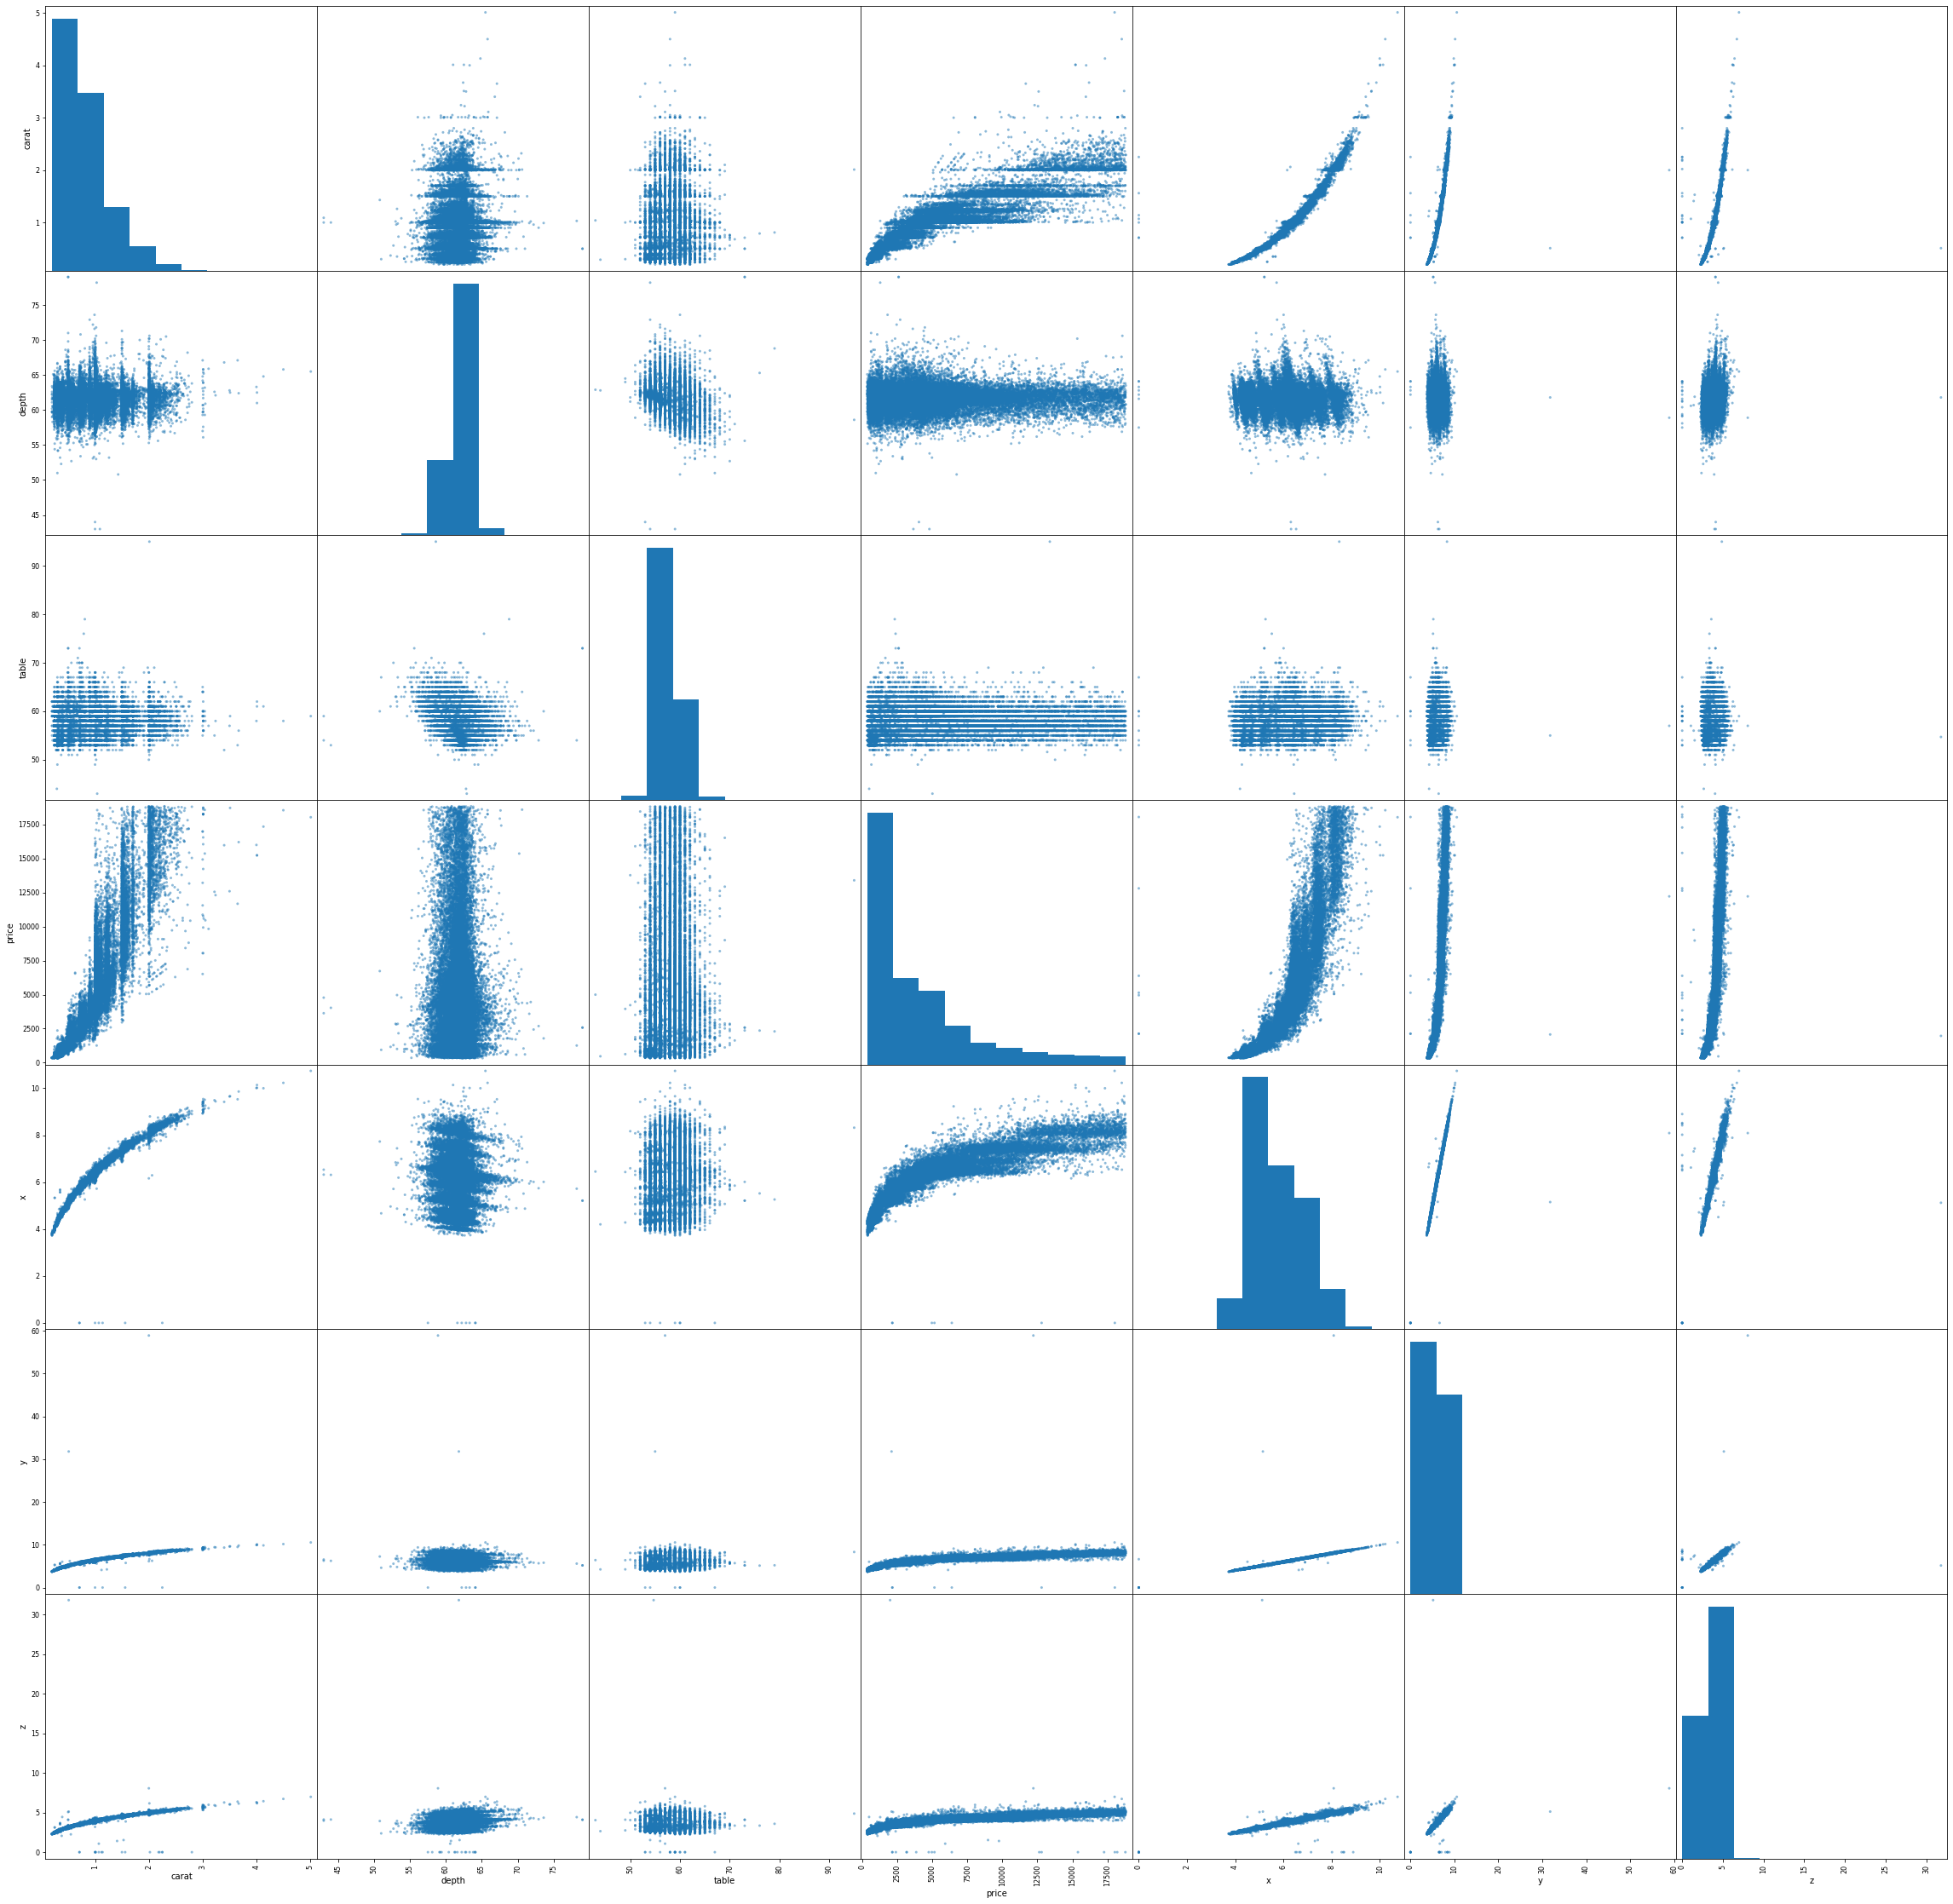

In [5]:
from pandas.plotting import scatter_matrix
attributes = ["carat","cut","color","clarity","depth","table","price","x","y","z"]
scatter_matrix(train[attributes], figsize=(40,40))

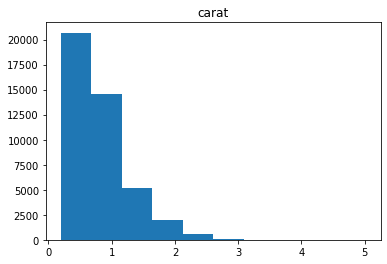

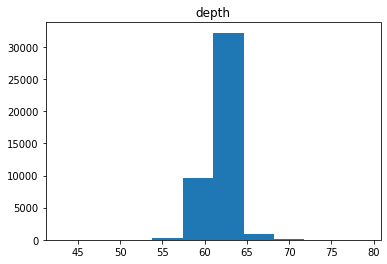

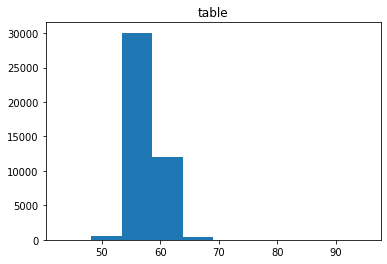

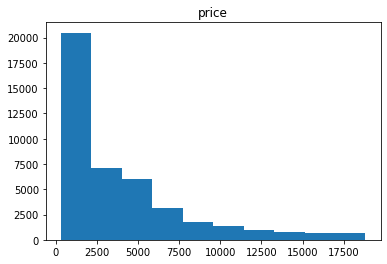

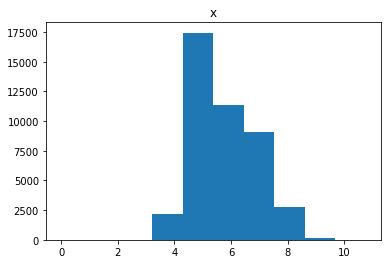

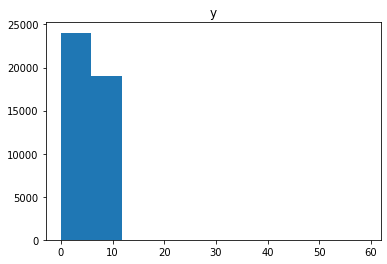

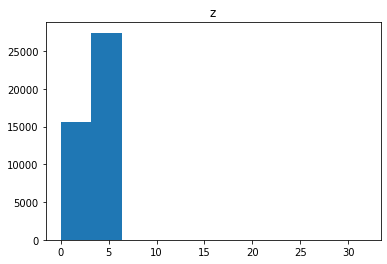

In [10]:
no=["color","clarity","cut","Unnamed: 0"]

for i in train.columns:
    if  i not in no:
                plt.hist( train[i])  
                plt.title(i)
                plt.show()
    else: continue  

In [26]:
train.nunique()

Unnamed: 0    43040
carat           231
cut               5
color             7
clarity           8
depth           181
table           123
price         10570
x               553
y               549
z               374
dtype: int64

In [4]:
print((x_train['cut'].unique()))
print((x_train['color'].unique()))
print((x_train['clarity'].unique()))

['Premium' 'Good' 'Very Good' 'Fair' 'Ideal']
['E' 'I' 'J' 'F' 'H' 'D' 'G']
['SI1' 'VS2' 'SI2' 'VVS2' 'VVS1' 'I1' 'VS1' 'IF']


In [18]:

print(x_train["cut"].value_counts())
print("###############")
print(x_train["color"].value_counts())
print("###############")
print(x_train["clarity"].value_counts())

Ideal        17424
Premium      11031
Very Good     9407
Good          3910
Fair          1268
Name: cut, dtype: int64
###############
G    9080
E    7723
F    7527
H    6640
D    5555
I    4297
J    2218
Name: color, dtype: int64
###############
SI1     10363
VS2      9981
SI2      7380
VS1      6479
VVS2     3959
VVS1     2838
IF       1483
I1        557
Name: clarity, dtype: int64


/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


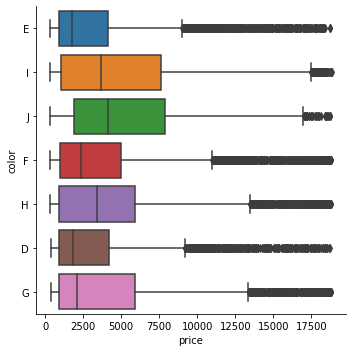

In [11]:
g = sns.factorplot("price", "color", data=train, kind="box")
g.set_axis_labels("price", "color")

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


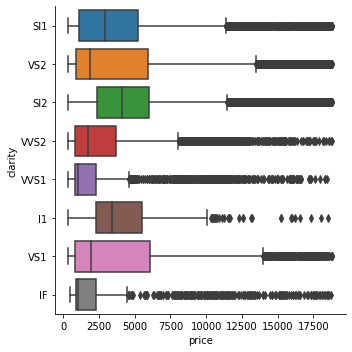

In [12]:
g = sns.factorplot("price", "clarity", data=train, kind="box")
g.set_axis_labels("price", "clarity")

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


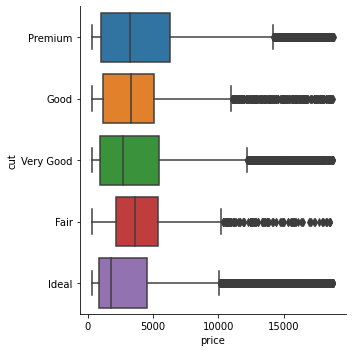

In [13]:
g = sns.factorplot("price", "cut", data=train, kind="box")
g.set_axis_labels("price", "cut")

In [ ]:
#Machine learning 

In [5]:
print((x_train['cut'].unique()))
print((x_train['color'].unique()))
print((x_train['clarity'].unique()))

['Premium' 'Good' 'Very Good' 'Fair' 'Ideal']
['E' 'I' 'J' 'F' 'H' 'D' 'G']
['SI1' 'VS2' 'SI2' 'VVS2' 'VVS1' 'I1' 'VS1' 'IF']


In [13]:
#spliting our own testing data before using the given test data 
train=pd.read_csv("../input/shai-ml/train.csv")

y_train=train["price"]
x_train=train.drop(["price","Unnamed: 0"], axis=1, inplace=False)


from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer
od=OrdinalEncoder()
transformer=OrdinalEncoder(categories=[['Fair','Good','Very Good','Premium','Ideal'],["J","I","H","G","F","E","D"],["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]])

transformer.fit_transform(x_train[["cut","color","clarity"]])
column_trans = make_column_transformer(
    (transformer, ["cut","color","clarity"]),
    remainder='passthrough')
x_train=column_trans.fit_transform(x_train)
x_train[1]

array([ 3.  ,  1.  ,  3.  ,  0.29, 62.4 , 58.  ,  4.2 ,  4.23,  2.63])

In [14]:
test=pd.read_csv("../input/shai-ml/test.csv")

first_col = list(test['Unnamed: 0'])
test=test.drop(["Unnamed: 0"], axis=1, inplace=False)


from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer
od=OrdinalEncoder()
transformer=OrdinalEncoder(categories=[['Fair','Good','Very Good','Premium','Ideal'],["J","I","H","G","F","E","D"],["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]])

transformer.fit_transform(test[["cut","color","clarity"]])
column_trans = make_column_transformer(
    (transformer, ["cut","color","clarity"]),
    remainder='passthrough')
test=column_trans.fit_transform(test)
test[1]

array([ 1.  ,  5.  ,  4.  ,  0.23, 56.9 , 65.  ,  4.05,  4.07,  2.31])

In [15]:
#creating pipeline 


pipeline = Pipeline([
 ('imputer', SimpleImputer(strategy="median")),
 
 ('std_scaler', StandardScaler())])


pipe = pipeline.fit(x_train)

test=pipe.transform(test)
x_train=pipe.transform(x_train)

#since we don't have any missing data non need for imputer 


In [16]:
#linear regression model 
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)





s=cross_val_score(lr,x_train,y_train,scoring="neg_mean_squared_error",cv=5)
s= np.sqrt(-s)

def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())
display_scores(s) 

y_pred_test=lr.predict(test)
y_pred_test[1]




Scores: [1042.70673269 1339.76140552 2965.99130704 1011.84012824  760.2491241 ]
Mean: 1424.1097395186312
Standard deviation: 792.5476405123412


219.7111154265467

In [21]:
#DecisionTreeRegressor 
from sklearn.tree import DecisionTreeRegressor 
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train, y_train)





s=cross_val_score(tree_reg,x_train,y_train,scoring="neg_mean_squared_error",cv=5)
s= np.sqrt(-s)

def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())
display_scores(s)
y_pred_test=tree_reg.predict(test)

y_pred_test[1]


Scores: [1013.70124634 1951.64877814 3826.86246521  368.87318681  592.71728618]
Mean: 1550.7605925354069
Standard deviation: 1260.5148654541774


361.0

In [20]:
# RandomForestRegressor

sample=pd.read_csv("../input/shai-ml/sample_submission.csv")
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()

forest_reg.fit(x_train, y_train)




       
      
s=cross_val_score(forest_reg,x_train,y_train,scoring="neg_mean_squared_error",cv=5)
s= np.sqrt(-s)

def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())

display_scores(s) 

y_pred_test=forest_reg.predict(test)

y_pred_test[1]


Scores: [ 813.37262831 1401.51228572 3869.52401495  254.0853675   487.16481895]
Mean: 1365.1318230849765
Standard deviation: 1310.1902369193647


386.37

In [22]:
# XGBR


sample=pd.read_csv("../input/shai-ml/sample_submission.csv")
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
XGBR = XGBRegressor()

XGBR.fit(x_train, y_train)




      
      
s=cross_val_score(XGBR,x_train,y_train,scoring="neg_mean_squared_error",cv=5)
s= np.sqrt(-s)

def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())
display_scores(s) 

pre_test=XGBR.predict(test)

y_pred_test[1]


Scores: [ 696.86518658 1364.25656561 3680.03733223  192.55931255  443.12801238]
Mean: 1275.3692818686238
Standard deviation: 1264.1281050740622


361.0

In [23]:
final_results=XGBR.predict(test)
sample["price"]=final_results

sample.to_csv('sample.csv',index = False)
sample

,Unnamed: 0,price
0,1,359.239349
1,3,355.114136
2,8,351.337738
3,10,298.946686
4,12,371.704926
...,...,...
10895,53922,2943.930908
10896,53923,3040.791016
10897,53933,2950.695068
10898,53934,2846.700684
